# <center><b><h1>NeuralNetwork (All Features)</h1></b></center>

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [6]:
ratio_folder = "ratio0.5/"

In [7]:
df_X_train = pd.read_csv("../Data/"+ratio_folder+"X_train.csv", index_col=0)
df_X_train.shape

(11272, 16)

In [8]:
df_y_train = pd.read_csv("../Data/"+ratio_folder+"y_train.csv", index_col=0)
df_y_train.shape

(11272, 1)

In [9]:
df_X_val = pd.read_csv("../Data/"+ratio_folder+"X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [10]:
df_y_val = pd.read_csv("../Data/"+ratio_folder+"y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

proporzione degli attuali positivi quanto sono stati identificati in maniera corretta 

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [11]:
best_score_sl = actual_score = 0
best_i_sl = 0
for i in range(1,32,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.6153024397160839 Actual_Score:  0.6153024397160839
I:  2 Best_I:  2 Best_Score:  0.6442625730113588 Actual_Score:  0.6442625730113588
I:  3 Best_I:  3 Best_Score:  0.6561910600034572 Actual_Score:  0.6561910600034572
I:  4 Best_I:  4 Best_Score:  0.6783498519945562 Actual_Score:  0.6783498519945562
I:  5 Best_I:  5 Best_Score:  0.6979357292732804 Actual_Score:  0.6979357292732804
I:  6 Best_I:  6 Best_Score:  0.7211318467595687 Actual_Score:  0.7211318467595687
I:  7 Best_I:  6 Best_Score:  0.7211318467595687 Actual_Score:  0.7117324885062741
I:  8 Best_I:  8 Best_Score:  0.7304427477553879 Actual_Score:  0.7304427477553879
I:  9 Best_I:  9 Best_Score:  0.7371329549467784 Actual_Score:  0.7371329549467784
I:  10 Best_I:  9 Best_Score:  0.7371329549467784 Actual_Score:  0.7306376266925197
I:  11 Best_I:  11 Best_Score:  0.7462054031374955 Actual_Score:  0.7462054031374955
I:  12 Best_I:  11 Best_Score:  0.7462054031374955 Actual_Score:  0.740181917624972


In [12]:
best_score_twol = actual_score = 0
best_i_twol = best_j_twol = 0
for i in range(1,32,1):
    for j in range(1,32,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
Best_I:  1 Best_J:  22 Best_Score:  0.6415066019435955 Actual_Score:  0.6065238407801827
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
Best_I:  2 Best_J:  24 Best_Score:  0.6608695285700341 Actual_Score:  0.6516020262245151
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 

I,J:  17 - 20
I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
Best_I:  15 Best_J:  18 Best_Score:  0.7785103495360125 Actual_Score:  0.7581116835953987
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
Best_I:  18 Best_J:  19 Best_Score:  0.7795833087721196 Actual_Score:  0.7635100662367059
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 1

## 3 Find the best random state for both single layer and two layers

In [13]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.764123263528335 Actual_Score:  0.764123263528335
I:  2 Best_Random_State:  2 Best_Score:  0.7675521718912641 Actual_Score:  0.7675521718912641
I:  3 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7677703916664558
I:  4 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7598947816046383
I:  5 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7656541864223053
I:  6 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7624305962808555
I:  7 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7544741924291358
I:  8 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7591583694029665
I:  9 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7579324820287536
I:  10 Best_Random_State:  3 Best_Score:  0.7677703916664558 Actual_Score:  0.7647021734885115
I:  11 Best_Random_State:  3 Best_Score:  0.7677703916664558 

I:  87 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7680406695336459
I:  88 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7610548885766859
I:  89 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7553901381888277
I:  90 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7640586358739994
I:  91 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7649943258985217
I:  92 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7568017562933946
I:  93 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7534668568214895
I:  94 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7673062123922937
I:  95 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7753734368093887
I:  96 Best_Random_State:  68 Best_Score:  0.7754935623552471 Actual_Score:  0.7553460755557776
I:  97 Best_Random_State:  68 Best_Score

In [14]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.7493165496446254 Actual_Score:  0.7493165496446254
I:  2 Best_Random_State:  2 Best_Score:  0.7836541316806163 Actual_Score:  0.7836541316806163
I:  3 Best_Random_State:  2 Best_Score:  0.7836541316806163 Actual_Score:  0.77834143048001
I:  4 Best_Random_State:  2 Best_Score:  0.7836541316806163 Actual_Score:  0.7705550799881574
I:  5 Best_Random_State:  2 Best_Score:  0.7836541316806163 Actual_Score:  0.7533457537454713
I:  6 Best_Random_State:  6 Best_Score:  0.784555866365061 Actual_Score:  0.784555866365061
I:  7 Best_Random_State:  6 Best_Score:  0.784555866365061 Actual_Score:  0.7776502336592185
I:  8 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7962387258495641
I:  9 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7572207201866766
I:  10 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7770336150120303
I:  11 Best_Random_State:  8 Best_Score:  0.7962387258495641 Act

I:  88 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7831434459480047
I:  89 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7512506022876861
I:  90 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7707148692813471
I:  91 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7936914759148741
I:  92 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7809642361184631
I:  93 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7770112517041303
I:  94 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7788473853355278
I:  95 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7791785375101193
I:  96 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.788676967522907
I:  97 Best_Random_State:  8 Best_Score:  0.7962387258495641 Actual_Score:  0.7909942488765228
I:  98 Best_Random_State:  8 Best_Score:  0.7962387

## 4. Compute metrics on the best architecture

In [15]:
if best_score_sl > best_score_twol:
    best_architecture = "Single Layer"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  30
For the layer  2  the best number of neurons is :  2


### 4.3 Confusion Matrix

In [16]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[20420  8481]
 [  214  1662]]


### 4.2 Accuracy

In [17]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.7174838353315788


### 4.3 Recall (or Sensitivity)

In [18]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.8859275053304904


### 4.4 Error

In [19]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.2825161646684212


### 4.5 Specificity

In [20]:
specificity = tn / (tn+fp)

print(specificity)

0.7065499463686378


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [21]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.29345005363136223
0.29345005363136223


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [22]:
precision = tp / float(tp+fp)

print(precision)

0.16385684708666076


## 5 ROC curve

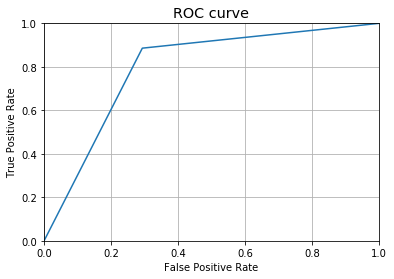

In [23]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Save the model

In [24]:
joblib.dump(mlp, 'NeuralNetwork - Second Run - ratio1.pkl') 

['NeuralNetwork - Second Run - ratio1.pkl']